## Exercise 3 (p.414, Chap.10)

#### 3. In this problem, you will perform K-means clustering manually, with K = 2, on a small example with n = 6 observations and p = 2 features. The observations are as follows.

##### Obs. X1 X2
##### 1 1 4
##### 2 1 3
##### 3 0 4
##### 4 5 1
##### 5 6 2
##### 6 4 0

#### (a) Plot the observations.

In [1]:
set.seed(530)
X1 = c(1,1,0,5,6,4)
X2 = c(4,3,4,1,2,0)
X = cbind(X1,X2)

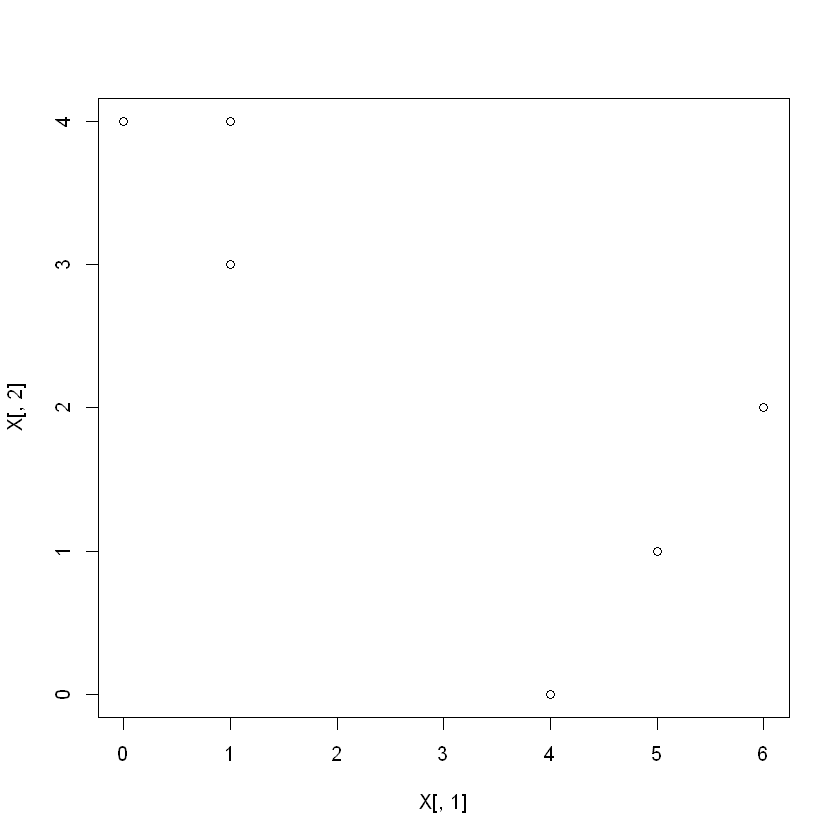

In [2]:
plot(X[,1],X[,2])

#### (b) Randomly assign a cluster label to each observation. You can use the sample() command in R to do this. Report the cluster labels for each observation.

In [3]:
labels = sample(2, nrow(X), replace=T)
labels

[1] 1 2 2 2 1 1

#### (c) Compute the centroid for each cluster.

In [4]:
C1 = c(mean(X[labels==1, 1]), mean(X[labels==1, 2]))
C2 = c(mean(X[labels==2, 1]), mean(X[labels==2, 2]))

print(C1)
print(C2)

[1] 3.666667 2.000000
[1] 2.000000 2.666667


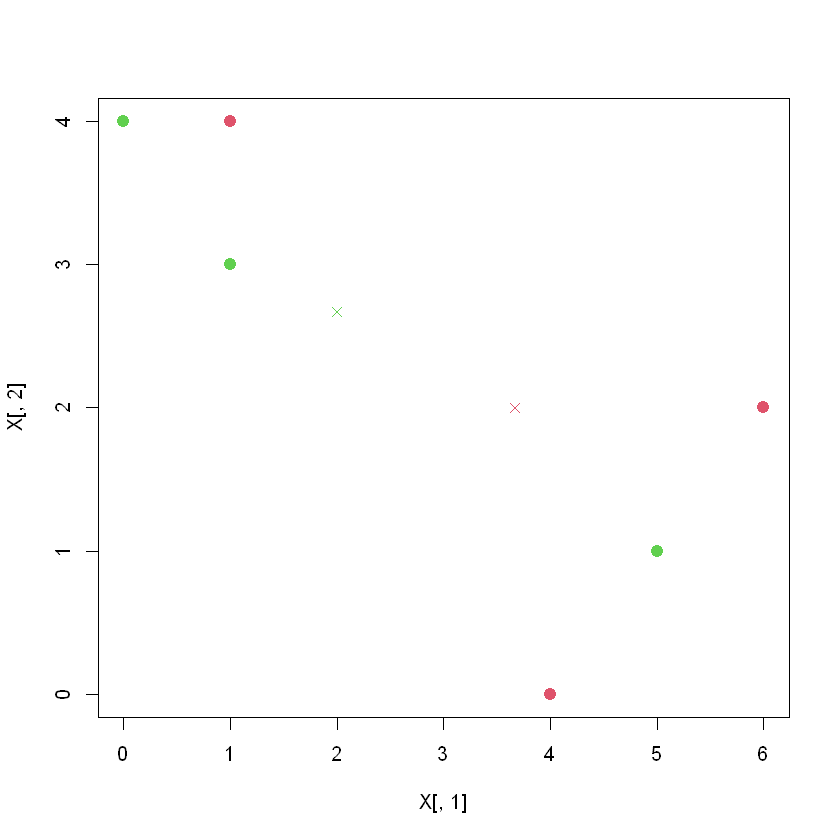

In [5]:
plot(X[,1], X[,2], col=(labels+1), pch=20, cex=2)
points(C1[1], C1[2], col=2, pch=4)
points(C2[1], C2[2], col=3, pch=4)

#### (d) Assign each observation to the centroid to which it is closest, in terms of Euclidean distance. Report the cluster labels for each observation.

In [6]:
euclid = function(a, b) {
  return(sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2))
}
assign_labels = function(X, C1, C2) {
  labels = rep(NA, nrow(X))
  for (i in 1:nrow(X)) {
    if (euclid(X[i,], C1) < euclid(X[i,], C2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
  }
  return(labels)
}
labels = assign_labels(X, C1, C2)
labels

[1] 2 2 2 1 1 1

#### (e) Repeat (c) and (d) until the answers obtained stop changing.

In [7]:
last_labels = rep(-1, 6)
while (!all(last_labels == labels)) {
  last_labels = labels
  C1 = c(mean(X[labels==1, 1]), mean(X[labels==1, 2]))
  C2 = c(mean(X[labels==2, 1]), mean(X[labels==2, 2]))
  print(C1)
  print(C2)
  labels = assign_labels(X, C1, C2)
}

[1] 5 1
[1] 0.6666667 3.6666667


In [8]:
labels

[1] 2 2 2 1 1 1

#### (f) In your plot from (a), color the observations according to the cluster labels obtained.

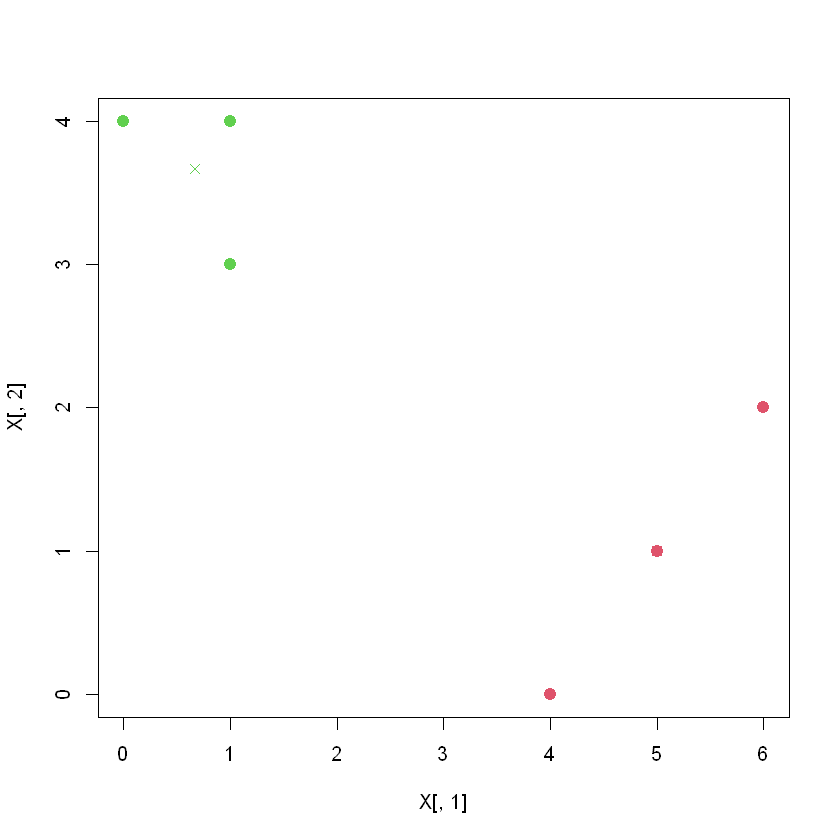

In [9]:
plot(X[,1], X[,2], col=(labels+1), pch=20, cex=2)
points(C1[1], C1[2], col=2, pch=4)
points(C2[1], C2[2], col=3, pch=4)

## Exercise 4 (p.414, Chap.10)

#### 4. Suppose that for a particular data set, we perform hierarchical clustering using single linkage and using complete linkage. We obtain two dendrograms.

#### (a) At a certain point on the single linkage dendrogram, the clusters {1, 2, 3} and {4, 5} fuse. On the complete linkage dendrogram, the clusters {1, 2, 3} and {4, 5} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

In [10]:
## The complete linkage dendrogram record the largest of the dissimilarities while single linkage dendrogram records the smalest of the dissimilarities.
## Therefore, there is not enough information to tell.

#### (b) At a certain point on the single linkage dendrogram, the clusters {5} and {6} fuse. On the complete linkage dendrogram, the clusters {5} and {6} also fuse at a certain point. Which fusion will occur higher on the tree, or will they fuse at the same height, or is there not enough information to tell?

In [11]:
## They will fuse at the same height.

## Exercise 8 (p.416, Chap.10)

#### 8. In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev output of the prcomp() function.

#### On the USArrests data, calculate PVE in two ways:

#### (a) Using the sdev output of the prcomp() function, as was done in Section 10.2.3.

In [12]:
library(ISLR)
set.seed(530)

In [13]:
pr_out = prcomp(USArrests, center=T, scale=T)
pr_var = pr_out$sdev^2
pve = pr_var / sum(pr_var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

#### (b) By applying Equation 10.8 directly. That is, use the prcomp() function to compute the principal component loadings. Then, use those loadings in Equation 10.8 to obtain the PVE.

#### These two approaches should give the same results.
#### Hint: You will only obtain the same results in (a) and (b) if the same data is used in both cases. For instance, if in (a) you performed prcomp() using centered and scaled variables, then you must center and scale the variables before applying Equation 10.3 in (b).

In [14]:
loadings = pr_out$rotation
pve2 = rep(NA, 4)
dmean = apply(USArrests, 2, mean)
dsdev = sqrt(apply(USArrests, 2, var))
dsc = sweep(USArrests, MARGIN=2, dmean, "-")
dsc = sweep(dsc, MARGIN=2, dsdev, "/")
for (i in 1:4) {
  proto_x = sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x = apply(proto_x, 1, sum)
  pve2[i] = sum(pc_x^2)
}
pve2 = pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

## Exercise 9 (p.416, Chap.10)

#### 9. Consider the USArrests data. We will now perform hierarchical clustering on the states.

#### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [15]:
library(ISLR)
set.seed(530)

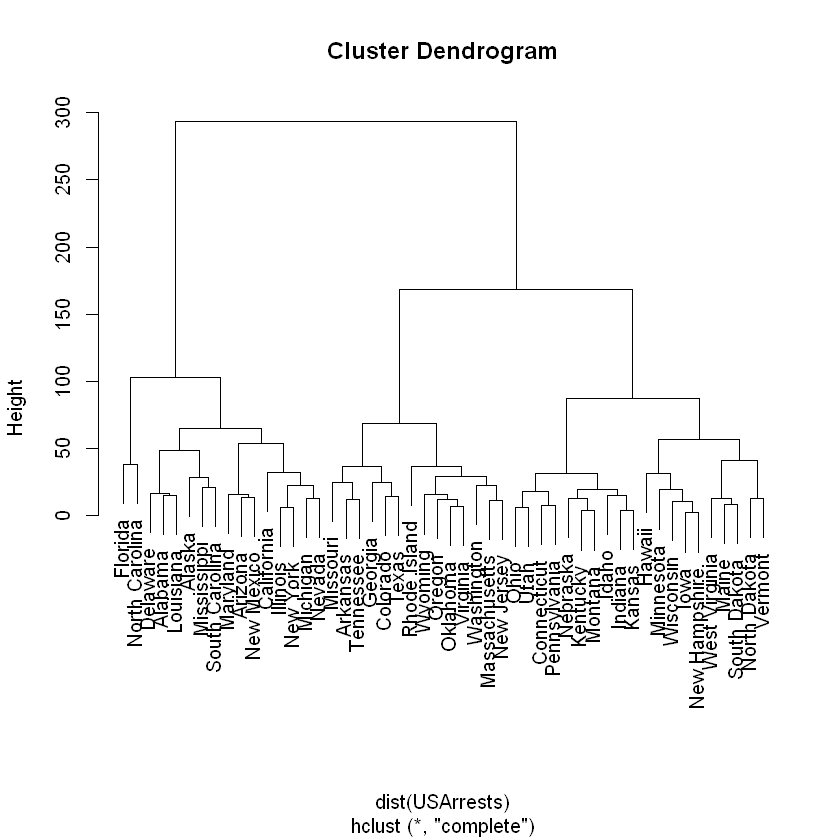

In [16]:
hc_complete = hclust(dist(USArrests), method="complete")
plot(hc_complete)

#### (b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [17]:
cutree(hc_complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

In [18]:
table(cutree(hc_complete, 3))


 1  2  3 
16 14 20 

#### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

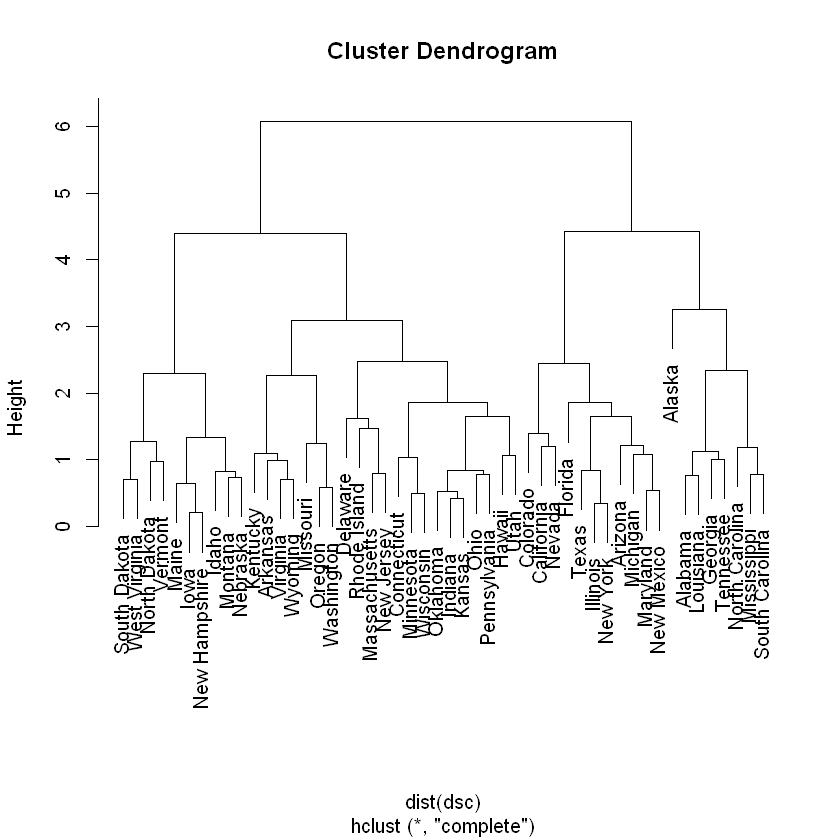

In [19]:
dsc = scale(USArrests)
hcs_complete = hclust(dist(dsc), method="complete")
plot(hcs_complete)

#### (d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

In [20]:
cutree(hcs_complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [21]:
table(cutree(hcs_complete, 3))


 1  2  3 
 8 11 31 

In [22]:
table(cutree(hcs_complete, 3), cutree(hc_complete, 3))

   
     1  2  3
  1  6  2  0
  2  9  2  0
  3  1 10 20

## Exercise 10 (p.417, Chap.10)

#### 10. In this problem, you will generate simulated data, and then perform PCA and K-means clustering on the data.

#### (a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.
#### Hint: There are a number of functions in R that you can use to generate data. One example is the rnorm() function; runif() is another option. Be sure to add a mean shift to the observations in each class so that there are three distinct classes.

In [23]:
set.seed(530)
x = matrix(rnorm(20*3*50, mean=0, sd=0.001), ncol=50)
x[1:20, 2] = 1
x[21:40, 1] = 2
x[21:40, 2] = 2
x[41:60, 1] = 1

#### (b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

In [24]:
pca = prcomp(x)
summary(pca)

Importance of components:
                         PC1    PC2      PC3      PC4      PC5     PC6      PC7
Standard deviation     1.008 0.5822 0.001747 0.001702 0.001692 0.00164 0.001549
Proportion of Variance 0.750 0.2500 0.000000 0.000000 0.000000 0.00000 0.000000
Cumulative Proportion  0.750 1.0000 0.999970 0.999970 0.999970 0.99997 0.999980
                            PC8      PC9     PC10     PC11     PC12     PC13
Standard deviation     0.001515 0.001447 0.001408 0.001369 0.001355 0.001299
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999980 0.999980 0.999980 0.999980 0.999980 0.999990
                           PC14     PC15     PC16     PC17     PC18     PC19
Standard deviation     0.001266 0.001196 0.001168 0.001148 0.001088 0.001076
Proportion of Variance 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
Cumulative Proportion  0.999990 0.999990 0.999990 0.999990 0.999990 0.999990
                           PC20  PC21 

In [25]:
pca$x[,1:2]

PC1,PC2
-0.7063822,-7.064072e-01
-0.7062843,-7.063092e-01
-0.7063885,-7.064134e-01
-0.7061067,-7.061320e-01
-0.7074627,-7.074887e-01
-0.7074247,-7.074501e-01
-0.7073505,-7.073736e-01
-0.7086725,-7.086943e-01
-0.7068667,-7.068945e-01
-0.7068174,-7.068430e-01


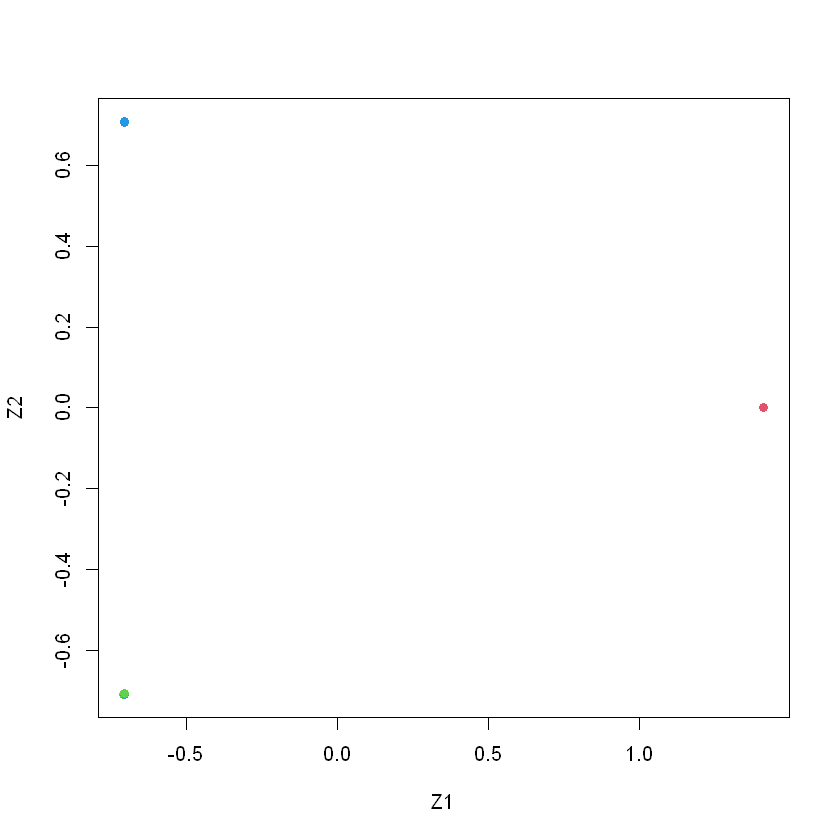

In [26]:
plot(pca$x[,1:2], col=2:4, xlab="Z1", ylab="Z2", pch=19) 

#### (c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels?
#### Hint: You can use the table() function in R to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

In [27]:
km = kmeans(x, 3, nstart=20)
table(km$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

#### (d) Perform K-means clustering with K = 2. Describe your results.

In [28]:
km = kmeans(x, 2, nstart=20)
km$cluster

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

#### (e) Now perform K-means clustering with K = 4, and describe your results.

In [29]:
km = kmeans(x, 4, nstart=20)
km$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 2 3 3 2 3 2 3 3 2 3 2 2 2 3 2 2
[39] 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

#### (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

In [30]:
km = kmeans(pca$x[,1:2], 3, nstart=20)
table(km$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1 20  0  0
  2  0 20  0
  3  0  0 20

#### (g) Using the scale() function, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.

In [31]:
km = kmeans(scale(x), 3, nstart=20)
km$cluster

[1] 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 1 1 2 1 1 2 1 2 1 3 2 2 1 2 2
[39] 2 2 3 3 3 3 1 2 2 2 3 3 2 3 3 2 2 2 3 3 3 2